### Step_0 importing libraries

In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import statsmodels.api as sm
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from statistics import mean

## Part 1: Regression on California Test Scores

#### Find the url for the California Test Score Data Set from the following website


In [2]:
df1 = pd.read_csv("/Users/katamezo/Documents/columbia/fall_2021/machine_learning/Mid-Term Data/spam_dataset.csv")
df1.head(10)

,Unnamed: 0,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


In [3]:
df1.dtypes

Unnamed: 0      int64
distcod         int64
county         object
district       object
grspan         object
enrltot         int64
teachers      float64
calwpct       float64
mealpct       float64
computer        int64
testscr       float64
compstu       float64
expnstu       float64
str           float64
avginc        float64
elpct         float64
readscr       float64
mathscr       float64
dtype: object

The target data (i.e. the dependent variable) is named "testscr".  You can use all  variables in the data except for "readscr" and "mathscr" in the following analysis.  (These two variables were used to generate the dependent variable).


In [4]:
df1 = df1.iloc[:, 1:]
y = df1['testscr'] 

#I kept only the numberical variables as X, and made sure all of them are float 
numerical_cols = ['enrltot', 'teachers', 'calwpct', 'mealpct', 'computer', 'compstu', 'expnstu', 'str', 'avginc', 'elpct']
df1[numerical_cols] = df1[numerical_cols].astype('float64')
X=df1[numerical_cols]
X.head(10)

,enrltot,teachers,calwpct,mealpct,computer,compstu,expnstu,str,avginc,elpct
0,195.0,10.900000,0.510200,2.040800,67.0,0.343590,6384.911133,17.889910,22.690001,0.000000
1,240.0,11.150000,15.416700,47.916698,101.0,0.420833,5099.380859,21.524664,9.824000,4.583333
2,1550.0,82.900002,55.032299,76.322601,169.0,0.109032,5501.954590,18.697226,8.978000,30.000002
3,243.0,14.000000,36.475399,77.049202,85.0,0.349794,7101.831055,17.357143,8.978000,0.000000
4,1335.0,71.500000,33.108601,78.427002,171.0,0.128090,5235.987793,18.671329,9.080333,13.857677
5,137.0,6.400000,12.318800,86.956497,25.0,0.182482,5580.146973,21.406250,10.415000,12.408759
6,195.0,10.000000,12.903200,94.623703,28.0,0.143590,5253.331055,19.500000,6.577000,68.717949
7,888.0,42.500000,18.806299,100.000000,66.0,0.074324,4565.746094,20.894117,8.174000,46.959461
8,379.0,19.000000,32.189999,93.139801,35.0,0.092348,5355.548340,19.947369,7.385000,30.079157
9,2247.0,108.000000,78.994202,87.316399,0.0,0.000000,5036.211426,20.805555,11.613333,40.275921


### 1.1 Visualize the univariate distribution of the target feature and each of the three continuous explanatory variables that you think are likely to have a relationship with the target feature.   

Text(0.5, 1.0, 'Distribution of test scores')

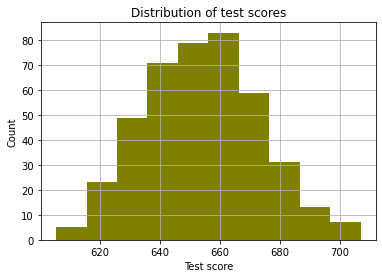

In [5]:
#distribution of target feature 

df1['testscr'].hist(color='olive')
plt.xlabel('Test score')
plt.ylabel('Count')
plt.title('Distribution of test scores')

Text(0.5, 1.0, 'Distribution of computers per student')

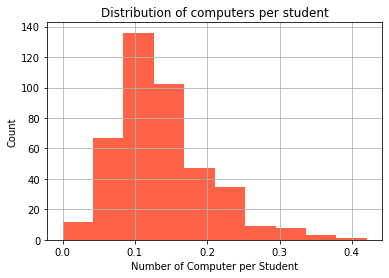

In [6]:
df1['compstu'].hist(color='#FF6347')
plt.xlabel('Number of Computer per Student')
plt.ylabel('Count')
plt.title('Distribution of computers per student')

Text(0.5, 1.0, 'Distribution of teachers')

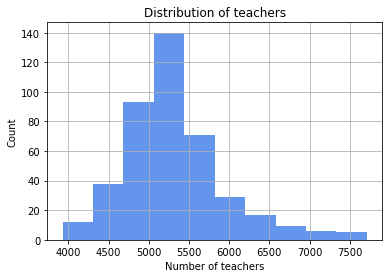

In [7]:
df1['expnstu'].hist(color='#6495ED')
plt.xlabel('Number of teachers')
plt.ylabel('Count')
plt.title('Distribution of teachers')



Text(0.5, 1.0, 'Distribution of income in districts')

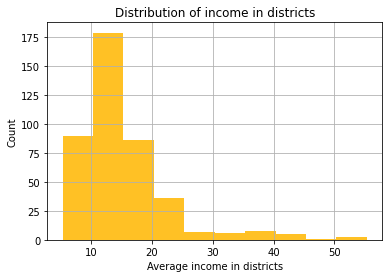

In [8]:
df1['avginc'].hist(color='#FFC125')
plt.xlabel("Average income in districts")
plt.ylabel('Count')
plt.title('Distribution of income in districts')

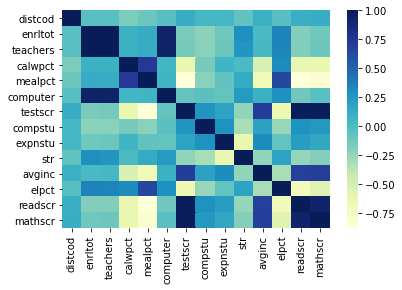

In [9]:
#correlation of all the variables 

filtered=df1.copy()
sns.heatmap(filtered.corr(), cmap="YlGnBu");

### 1.2 Visualize the dependency of the target on each feature from 


Text(0, 0.5, 'Ration of computer per student')

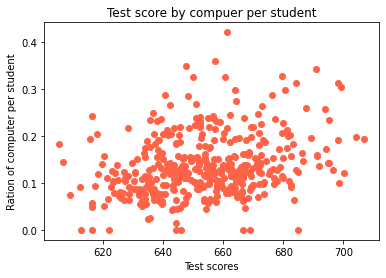

In [10]:
# test score and compuer per student
plt.scatter(df1['testscr'], df1['compstu'], color = "#FF6347")
plt.title('Test score by compuer per student')
plt.xlabel("Test scores")
plt.ylabel('Ration of computer per student')

Text(0, 0.5, 'Expenditure per student')

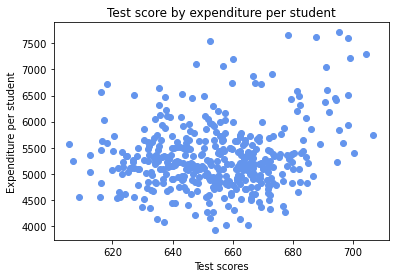

In [11]:
plt.scatter(df1['testscr'], df1['expnstu'], color = "#6495ED")
plt.title('Test score by expenditure per student')
plt.xlabel("Test scores")
plt.ylabel('Expenditure per student')

#it is hard to tell whether there is a realtionship or not, but it is not a strong one

Text(0, 0.5, 'Average income in districts')

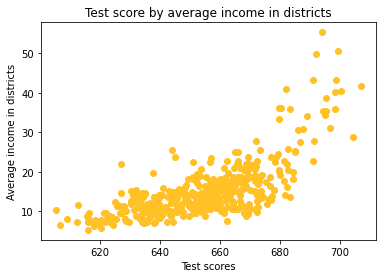

In [12]:
plt.scatter(df1['testscr'], df1['avginc'], color = "#FFC125")
plt.title('Test score by average income in districts')
plt.xlabel("Test scores")
plt.ylabel('Average income in districts')

### 1.3 Split data in training and test set. Build models that evaluate the relationship between all available X variables in the California test dataset and the target variable. Evaluate KNN for regression, Linear Regression (OLS), Ridge, and Lasso using cross-validation with the default parameters. Does scaling the data with the StandardScaler help?

In [13]:
#split data in training and test
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=0)
X_train.shape

(315, 10)

### scaling the data

In [14]:
# Scaling the data with StandardScaler

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### KNN 

In [15]:
#KNN regressior 
knn = KNeighborsRegressor().fit(X_train, y_train)
knn_sc = KNeighborsRegressor().fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(knn.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(knn_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(knn_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(KNeighborsRegressor(), X_train, y_train, scoring=None))))

#scaled cross-validation 
print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(
    KNeighborsRegressor(), X_train_scaled, y_train, scoring=None))))

Training set score without CV : 0.318
Test set score without CV: -0.024
Training set score without CV but scaled: 0.822
Test set score without CV but scaled: 0.729
Cross validation without scaling: 0.056
Cross validation with scaling: 0.739


### Linear regression

In [16]:
##Linear Regression 
lr = LinearRegression().fit(X_train, y_train)
lr_sc=LinearRegression().fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(lr.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(lr.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(lr_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(lr_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train, y_train, scoring="r2"))))

#scaled cross-validation 
print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(LinearRegression(), X_train_scaled, y_train, scoring="r2"))))

Training set score without CV : 0.808
Test set score without CV: 0.799
Training set score without CV but scaled: 0.808
Test set score without CV but scaled: 0.799
Cross validation without scaling: 0.794
Cross validation with scaling: 0.794


### Ridge

In [17]:
##Ridge Regression 
ridge = Ridge().fit(X_train, y_train)
ridge_sc =Ridge().fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(ridge.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(ridge.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(ridge_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(ridge_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(Ridge(), X_train, y_train, scoring= None))))

#scaled cross-validation 
print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(Ridge(), X_train_scaled, y_train, scoring=None))))

Training set score without CV : 0.808
Test set score without CV: 0.799
Training set score without CV but scaled: 0.808
Test set score without CV but scaled: 0.799
Cross validation without scaling: 0.794
Cross validation with scaling: 0.795


### Lasso

In [18]:
lasso = Lasso().fit(X_train, y_train)
lasso_sc=  Lasso().fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(lasso.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(lasso.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(lasso_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(lasso_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(Lasso(), X_train, y_train, scoring= None))))

#scaled cross-validation 
print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(Lasso(), X_train_scaled, y_train, scoring=None))))

Training set score without CV : 0.807
Test set score without CV: 0.798
Training set score without CV but scaled: 0.799
Test set score without CV but scaled: 0.794
Cross validation without scaling: 0.795
Cross validation with scaling: 0.788


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.989492172044265, tolerance: 10.929720799520851
  model = cd_fast.enet_coordinate_descent(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1142.6708174590585, tolerance: 8.497521986129499
  model = cd_fast.enet_coordinate_descent(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769.2437753616632, tolerance: 8.694900031505577
  model = cd_fast.enet_coordinate_descent(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/skl

I only compare the scaled and not scaled cross-validation models. Scaling did not make the model better in every case. In KNN, the scaling did change the Cross Validaton Point, the scoring got better. Scaling did not influence the scoring of Linear Regression. In the case of Ridge the model score got better while in the Lasso model the scaling made the model worse. But since scaling is crucial for the ML, scaled variables are better. 


### 1.4 Tune the parameters of the models where possible using GridSearchCV. Do the results improve?

In [19]:
#knn and GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 15, 2)} #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the best model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.751
best parameters: {'n_neighbors': 7}
test-set score: 0.716


In [20]:
#Linear Regression and GridSearchCV

param_grid ={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

grid = GridSearchCV(LinearRegression(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the best model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.794
best parameters: {'copy_X': True, 'fit_intercept': True, 'normalize': True}
test-set score: 0.799


In [21]:
#Ridge and GridSearchCV 

param_grid ={'alpha':[1, 10]}

grid = GridSearchCV(Ridge(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the best model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.796
best parameters: {'alpha': 10}
test-set score: 0.794


In [22]:
#Lasso and GridSearchCV 

param_grid ={'alpha':[1, 100], 'max_iter': [1, 100000]}

grid = GridSearchCV(Ridge(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the best model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.795
best parameters: {'alpha': 1, 'max_iter': 1}
test-set score: 0.799


After using GridSearchCV, the results did not improve in every case. Improvment can be observed in the Linear and Lasso models. In the Lasso model, the improvement is significant. The results of KNN and Ridge got worse with the GridSearchCV.

### 1.5 Compare the coefficients of your two best linear models (not knn), do they agree on which features are important?

In [23]:
print("lr_sc.coef_: {}".format(lr_sc.coef_))

lr_sc.coef_: [-2.65924605  1.3495415  -1.61906375 -8.97046881  0.93812036  0.64041941
  1.30257187 -0.26138847  4.49027776 -3.7413484 ]


In [24]:
print("ridge_sc.coef_: {}".format(ridge_sc.coef_))

ridge_sc.coef_: [-1.49202788  0.13695571 -1.65394936 -8.87843243  0.99773539  0.62815851
  1.28353659 -0.31919286  4.52350385 -3.7655957 ]


The two best models with the best scoring are the Linear and the Ridge. The coefficients are very similar to each other in almost every case. The bigger the absolute value of it, the more “important” it is.

### 1.6 Discuss which final model you would choose to predict new data


After using GridSearchCV I would choose Lasso and Linear moderl for prediciton since both models test-set score were 0.799. I would change the parameters of the models according the GridSearchCV, and I would use scaled data. 


## Part 2: Classification on red and white wine characteristics

##### First, import the red and the white wine csv files into separate pandas dataframes from the following website:

https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

(Note: you need to adjust the argument for read_csv() from sep=',' to sep=';')

Add a new column to each data frame called "winetype".  For the white wine dataset label the values in this column with a 0, indicating white wine.  For the red wine dataset, label values with a 1, indicating red wine.  Combine both datasets into a single dataframe.

The target data (i.e. the dependent variable) is "winetype"

In [25]:
white = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep = ';')

white['winetype'] = 0
white.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,0


In [26]:
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ';')
red['winetype']=1
red.head(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,winetype
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,1
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,1


In [27]:
winedf = pd.concat([white, red])
winedf.shape

(6497, 13)

In [28]:
y = winedf['winetype']
X = winedf.loc[:, winedf.columns != 'winetype']

### 2.1 Visualize the univariate distribution of the target feature and each of the three explanatory variables that you think are likely to have a relationship with the target feature.   

[Text(0.5, 1.0, 'Total sulfur dioxide by the type of wine')]

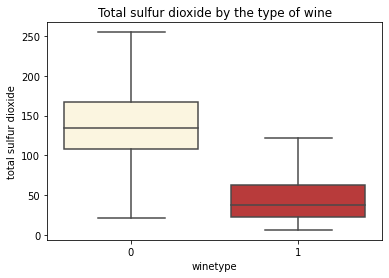

In [29]:
my_colors = ['#FFF8DC', '#CD2626']

sns.set_palette( my_colors )

sns.boxplot(x="winetype", y="total sulfur dioxide",
            data=winedf, showfliers = False).set(title='Total sulfur dioxide by the type of wine')

# for visualizational reason I do not show the outliers 


[Text(0.5, 1.0, 'Residual sugar by the type of wine')]

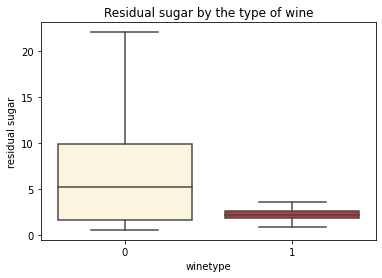

In [30]:
sns.boxplot(x="winetype", y="residual sugar",
            data=winedf, showfliers = False).set(title='Residual sugar by the type of wine')

[Text(0.5, 1.0, 'Chlorides by the type of wine')]

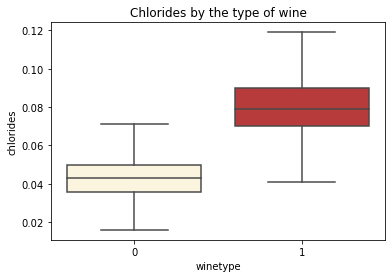

In [31]:
sns.boxplot(x="winetype", y="chlorides",
            data=winedf, showfliers = False).set(title='Chlorides by the type of wine')

### 2.2 Split data into training and test set. Build models that evaluate the relationship between all available X variables in the dataset and the target variable. Evaluate Logistic Regression, Penalized Logistic Regression, and KNN for classification using cross-validation. How different are the results? How does scaling the data with StandardScaler influence the results?



In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


### scaling the data

In [33]:
# Scaling the data with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic regression

In [34]:
#Logistic regression 
logreg = LogisticRegression(penalty='none').fit(X_train, y_train)
logreg_sc =LogisticRegression(penalty='none').fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(logreg.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(logreg_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(logreg_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(), X_train, y_train, scoring= None))))

#scaled cross-validation 

print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(), X_train_scaled, y_train, scoring=None))))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training set score without CV : 0.980
Test set score without CV: 0.981
Training set score without CV but scaled: 0.994
Test set score without CV but scaled: 0.994
Cross validation without scaling: 0.980
Cross validation with scaling: 0.993


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Penalized logreg

In [35]:
#Logistic regression 
pen_logreg = LogisticRegression(penalty='l2').fit(X_train, y_train)
pen_logreg_sc =LogisticRegression(penalty='l2').fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(pen_logreg.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(pen_logreg.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(pen_logreg_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(pen_logreg_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2'), X_train, y_train, scoring= None))))

#scaled cross-validation 

print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score(LogisticRegression(penalty='l2'), X_train_scaled, y_train, scoring=None))))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set score without CV : 0.981
Test set score without CV: 0.978


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Training set score without CV but scaled: 0.993
Test set score without CV but scaled: 0.994


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

Cross validation without scaling: 0.980
Cross validation with scaling: 0.993


### KNN

In [36]:
#KNN regression 
knn =  KNeighborsClassifier().fit(X_train, y_train)
knn_sc = KNeighborsClassifier().fit(X_train_scaled, y_train)

print("Training set score without CV : {:.3f}".format(knn.score(X_train, y_train)))
print("Test set score without CV: {:.3f}".format(knn.score(X_test, y_test)))

#scaled 
print("Training set score without CV but scaled: {:.3f}".format(knn_sc.score(X_train_scaled, y_train)))
print("Test set score without CV but scaled: {:.3f}".format(knn_sc.score(X_test_scaled, y_test)))

#cross-validation 
print("Cross validation without scaling: {:.3f}".format(np.mean(cross_val_score( KNeighborsClassifier(), X_train, y_train, scoring= None))))

#scaled cross-validation 
print("Cross validation with scaling: {:.3f}".format(np.mean(cross_val_score( KNeighborsClassifier(), X_train_scaled, y_train, scoring=None))))

Training set score without CV : 0.961
Test set score without CV: 0.935
Training set score without CV but scaled: 0.995
Test set score without CV but scaled: 0.992
Cross validation without scaling: 0.939
Cross validation with scaling: 0.994


After Cross validation the scoring of all the models are higher than 0.9 with and without scaling. The scaling of the X variables did not improve the scoring of the models in every case. In the case of logisitic regression and knn the models got better after scaling the Xs, but the penalized logisitic regression did not. 

### 2.3 Tune the parameters where possible using GridSearchCV. Do the results improve?


### Penalized logistic regression with GridSearchCV

In [37]:
#logistic and GridSearchCV
param_grid ={'penalty': ['l1','l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

grid = GridSearchCV(LogisticRegression(), param_grid=param_grid)

#use meta model methods to fit score and predict model:
grid.fit(X_train_scaled, y_train) #fiting the scaled model autmatically 

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
/Users/ka

best mean cross-validation score: 0.993
best parameters: {'C': 1, 'penalty': 'l2'}
test-set score: 0.994


/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/katamezo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"


In the case of Logisitc Regression, the results did not improve compare to the panalized logistic regression, the scores are the same. It is not suprising, since the GridSearchCV found that l2 penalty is the best parameter, the same penalty that I used in the previous model (without GridSearchCV). 

### knn with GridSearchCV

In [38]:
# knn and GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid,)

grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 3}
test-set score: 0.993


Interestingly, the test-scoring got slightly worse when I used GridSearchCV on the model. 

### 2.4 Change the cross-validation strategy in GridSearchCV from ‘stratified k-fold’ to ‘kfold’ with shuffling. Do the parameters for models that can be tuned change? Do they change if you change the random seed of the shuffling? Or if you change the random state of the split into training and test data?

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)

In [40]:
# Scaling the data with StandardScaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
kfold=KFold(n_splits = 7)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid, cv=kfold)

grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 3}
test-set score: 0.993


In [42]:
skfold= StratifiedKFold(n_splits= 7, shuffle=True, random_state = 3)

param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid=param_grid, cv=skfold)

grid.fit(X_train_scaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test_scaled, y_test)))

best mean cross-validation score: 0.994
best parameters: {'n_neighbors': 5}
test-set score: 0.992


Random state = 0
The parameters has changes, in the model with the straitfied kfold 3 number of neighbors were suggested, while in the model with shuffling 6 number of neighbors were suggested. The best CV score is better in the k-fold without suffeling, but the test-set scores are the same in both models. If I change the random_state in the training and test part, the results can be different.

Setting the random state in the stratified k-fold model does not changes the cross-validation and test-score, only the suggested parameters. 

Setting the random state in the training and test data changes the suggested parameters (n_neighbors) in the model as well as the cross-validation and test-set scores.

### 2.5 Lastly, compare the coefficients for Logistic Regression and Penalized Logistic Regression and discuss which final model you would choose to predict new data.

In [43]:
print("logreg .coef_: {}".format(logreg_sc.coef_))

logreg .coef_: [[-0.18950295  1.18500028 -0.41298895 -4.59964295  0.92261776  1.13409008
  -3.11854172  4.78515188  0.0491162   0.52046971  1.63193485  0.36934591]]


In [44]:
print("logreg .coef_: {}".format(pen_logreg_sc.coef_))

logreg .coef_: [[ 0.37813864  1.24905815 -0.35291118 -3.06575808  0.97724675  0.73848038
  -2.83977272  3.23645564  0.45570176  0.6496356   0.94020703  0.32985854]]


The coefficients are very similar to each other in both logisitc and penalized logistic regression models. After using GridSearchCV I woudl use penalized logtics regression, with l2 penalty and 1 'C'. The test-scoring is the highest in this model.